In [26]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from random import randint
import numpy as np

In [27]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

Using cpu device


In [28]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

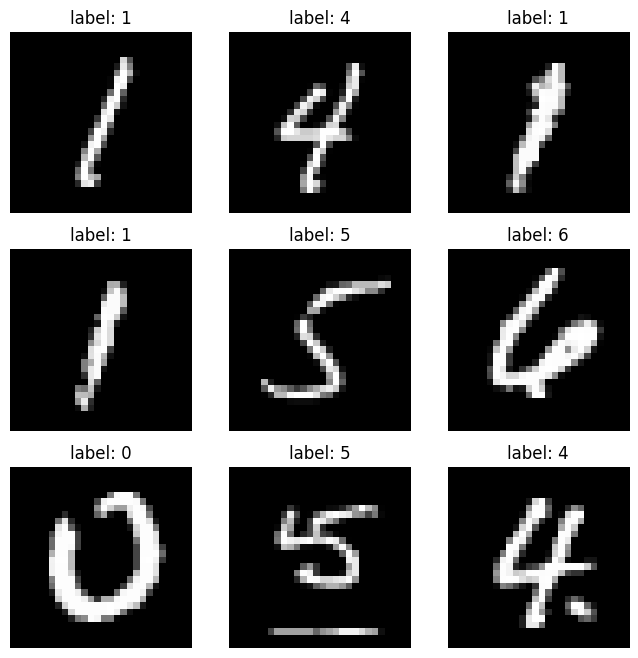

In [29]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0,len(training_data) - 1 )
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"label: {label}")
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [30]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [31]:
class NN1(nn.Module):
    def __init__(self):
        super(NN1, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [33]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [34]:
model_1 = NN1().to(device)

In [35]:
optimizer = torch.optim.SGD(model_1.parameters(), lr = learning_rate)

In [51]:
def train_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # prediction
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch%60000 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [37]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            y = y.to(device)
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [40]:
def test_loop_graph(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            y = y.to(device)
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    return test_loss, correct
    # print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [41]:
loss_fn = nn.CrossEntropyLoss()

In [45]:
from tqdm import tqdm

In [46]:
def evaluate(num_epoch, model, loss_fn, train_data, test_data):
    loss_arr = []
    accuracy_arr = []
    for i in tqdm(range(epochs)):
        # print(f"Epoch {i + 1} ", end = "")
        train_loop(train_data, model, loss_fn)
        loss, accuracy = test_loop_graph(test_data, model, loss_fn)

        loss_arr.append(loss)
        accuracy_arr.append(accuracy)

    print("DONE!")

    return loss_arr, accuracy_arr

In [47]:
loss, accuracy = evaluate(epochs, model_1, loss_fn, train_dataloader, test_dataloader)

100%|██████████| 10/10 [01:27<00:00,  8.72s/it]

DONE!


In [48]:
import seaborn as sns
sns.set()

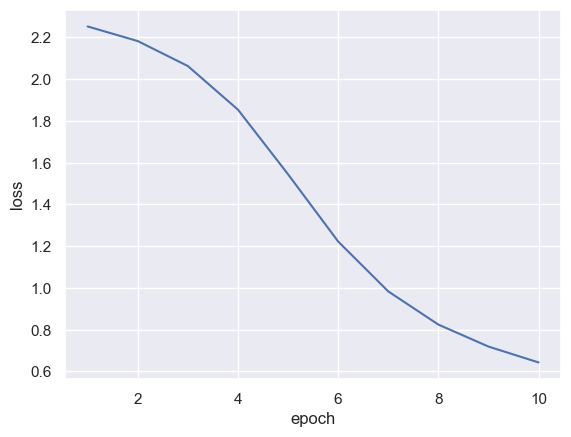

In [49]:
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(np.linspace(1, epochs, epochs), loss)

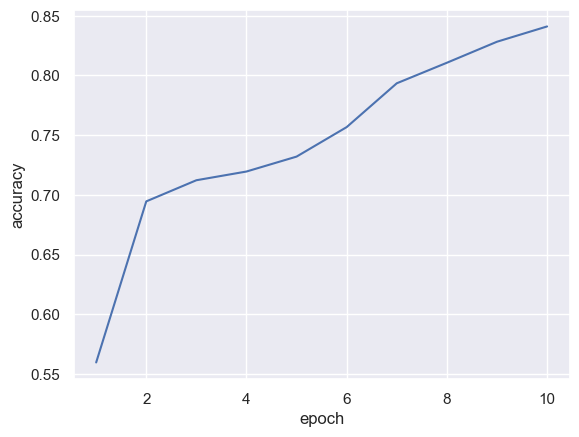

In [50]:
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(np.linspace(1, epochs, epochs), accuracy)